<a href="https://colab.research.google.com/github/serjduvk/Homework/blob/master/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%22HW_lessons_9_10_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание

Ноутбук в колаб: https://colab.research.google.com/drive/1d-vvpJW8IWSPeodFnfaEVaZIQrys8uU0?usp=sharing

**Дедлайн: 01.01.2021, 23:59**


Формат отчетности - jupyter notebook. Однако вычислять производные не обязательно в Markdown. Если вычисляете вручную, то дополнительно с ноутбуком, отправляйте pdf-файл с расписанным решением.

### Пример реализации градиентного спуска: https://github.com/ddvika/Data-Science-School-2020/blob/main/lecture_9/gradient_methods.ipynb

# Задания

Перед выполнением ДЗ посмотрите на ноутбук, прикрепленный по ссылке выше. Там вы найдете реализацию градиентного спуска с постоянным и дробным шагом.

### Задание 1. [1 point]

Релизуйте градиентный спуск с постоянным шагом и с дробным шагом для функции
$$
y = x_{1}^{2}+5 x_{2}^{2}
$$

в произвольно выбранной Вами точке.

In [20]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return x[0]**2+5*x[1]**2
    
def grad_f(x):
    return np.array([2*x[0], 10*x[1]])


Градиентный спуск с постоянным шагом

In [53]:
def grad_descent_const_step(x = np.array([0, 0]), alpha = 0.001, epsilon = 0.001):
    grad = grad_f(x)
    n = 0
    check = 0
    while (np.linalg.norm(grad) > epsilon) or (check < 3):
        x = x - alpha*grad
        grad = grad_f(x)
        n+=1
        if (np.linalg.norm(grad) <= epsilon): check +=1
    print("Градиентный спуск с постоянным шагом выполнил {} шагов".format(n))
    print("Точка с координатами х1 = {}, x2 = {}".format(x[0], x[1]))
    return x

In [54]:
x = grad_descent_const_step(alpha = 0.1)

Градиентный спуск с постоянным шагом выполнил 37 шагов
Точка с координатами х1 = 0.0002596148429267415, x2 = 0.0



Градиентный спуск с дроблением шага

In [26]:
def grad_descent_step_splitting(x = np.array([2, 2]), alpha = 0.022, epsilon = 0.001, ksi = 0.5, lambda_d = 0.35):
    grad = grad_f(x)
    n = 0
    n_alpha = 0
    alpha_k = alpha
    x_k0 = x
    check = 0
    while np.linalg.norm(grad) > epsilon or check < 3:
        grad = grad_f(x_k0)
        x_k1 = x_k0 - alpha_k*grad
        while f(x_k1) - f(x_k0) > - alpha_k * ksi * (np.linalg.norm(grad)**2):
            alpha_k *= lambda_d
            x_k1 = x_k0 - alpha_k*grad
            n_alpha+=1
        x_k0 = x_k0 - alpha_k*grad
        alpha_k = alpha
        n+=1
        if (np.linalg.norm(grad) <= epsilon): check +=1
    x = x_k0
    print("Градиентный спуск с дроблением шага выполнил {} шагов".format(n))
    print("Выполнено {} итераций дробления шага".format(n_alpha))
    print("Точка с координатами х1 = {}, x2 = {}".format(x[0], x[1]))
    return x

a = grad_descent_step_splitting()

Градиентный спуск с дроблением шага выполнил 188 шагов
Выполнено 0 итераций дробления шага
Точка с координатами х1 = 0.0004237539344739767, x2 = 1.034702030801644e-20


### Задание 2. [3 points]

Для функции из предыдущего задания реализуйте градиентный спуск, в котором значение шага (скорости обучения) будет изменяться по формуле циклического косинусного ожига. ( в англ. литературе - cosine annealing learning rate или cosine decay lr). 

Доп. литература:
- Циклический косинусный отжиг https://habr.com/ru/post/332534/

- Пример colise decay в библиотеке Pytorch:
https://www.programmersought.com/article/12164650026/

Градиентный спуск с циклическим косинусным ожигом 

In [15]:
def grad_descent_cos_ojig(x = np.array([2, 2]), alpha = 0.001, T=10000 ,M = 10):
    grad = grad_f(x)
    n = 0
    n_alpha = 0
    alpha_k = alpha
    x_k0 = x
    while n_alpha < T:
        alpha_k = alpha_k/2*(np.cos((np.pi*(n_alpha-1)%(T/M))/(T/M))+1)
        x_k0 = x_k0 - alpha_k*grad
        n_alpha+=1
                      
    x = x_k0
    
    print("Выполнено {} итераций".format(n_alpha))
    print("Точка с координатами х1 = {}, x2 = {}".format(x[0], x[1]))
    return x

a = grad_descent_cos_ojig()

Выполнено 10000 итераций
Точка с координатами х1 = 1.7031064726497134, x2 = 0.5155323632485631


### Задание 3. [0.75 point]
Проверьте работу Вашего градиентного спуска с косинусным отжигом на произвольной функции ( полином должен быть не меньше 3-ьего порядка и задан в пространстве не меньше $R^3$).

In [27]:
def f(x):
    return x[0]**2+5*x[1]**2+3*x[2]
    
def grad_f(x):
    return np.array([2*x[0], 10*x[1]], 6*x[2])

In [29]:
def grad_descent_cos_ojig(x = np.array([2, 2, 6]), alpha = 0.001, T=10000 ,M = 10):
    grad = grad_f(x)
    n = 0
    n_alpha = 0
    alpha_k = alpha
    x_k0 = x
    while n_alpha < T:
        alpha_k = alpha_k/2*(np.cos((np.pi*(n_alpha-1)%(T/M))/(T/M))+1)
        x_k0 = x_k0 - alpha_k*grad
        n_alpha+=1
                      
    x = x_k0
    
    print("Выполнено {} итераций".format(n_alpha))
    print("Точка с координатами х1 = {}, x2 = {}, x3={}".format(x[0], x[1], x[2]))
    return x

a = grad_descent_cos_ojig()

ValueError: ignored

### Задание 4.
Дана следующая плотность вероятности для случайной величины Х:
$$
f(x)=\left\{\begin{array}{r}
0 \text { npu } x \leq \pi \\
-\cos x \text { npu } \pi<x \leq \frac{3}{2} \pi \\
\text { 0 npu } x>\frac{3}{2} \pi
\end{array}\right.
$$

1. Постройте график данной плотности вероятности **[0.25 point]**

2. Определить вероятность попадания случайной величины X в интервал $\left[\pi, \frac{5}{4} \pi\right]$ **[0.75 point]**

3. Найти математическое ожидание и дисперсию случайной величины X . **[0.75 point]**

Так как мы не проходили интегрирование, то в 2 и 3 пунктах можете использовать
wolfram alpha (https://www.wolframalpha.com) для интегрирования. 

In [2]:
# библиотека для генерации случаных чисел
import random
# тут лежат некоторые математические функции
import math

# для работы с таблицами: DataFrame, Series
import pandas as pd
# для работы с массивами и матрицами чисел, некоторые статистические функции
import numpy as np
# тут лежат функции распределения случайных величин
from scipy import stats

# БЛОК ДЛИ РИСОВАНИЯ ГРАФИКОВ
# основная библиотека для рисования
import matplotlib.pyplot as plt
# дизайн картинок
plt.style.use('seaborn')
# позволяем отрисовавать картинки сразу в ноутбуке
%matplotlib inline
# Импортируем Seaborn:
import seaborn as sns

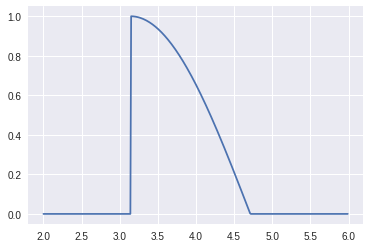

In [23]:
#функция плотности распределения 
x = np.arange(2, 6, 0.01)

def F(x):
    return 0 if x <= np.pi else  0 if x > 3*np.pi/2 else -np.cos(x)

plt.plot(x, np.array([F(y) for y in x]))


вероятность попадания случайной величины X в интервал $\left[\pi, \frac{5}{4} \pi\right]$



$$
P(\pi \leq X \leq \frac{5}{4} \pi)=\int_{\pi}^{\frac{5}{4}\pi} -cos(x) d x = 1
$$

Найти математическое ожидание и дисперсию случайной величины X

$$
M(X) =\int_{\pi}^{\frac{3}{2}\pi} x(-cos(x)) d x = 3.71
$$


$$
D(X) =\int_{\pi}^{\frac{3}{2}\pi} x^2(-cos(x)) d x-(M(X))^2 = 13.92-3.71^2=0.15
$$

### Задание 5 [1.5 point]

 Случайная величина Х задана функцией распределения F(x).

 $$F(x)=\left\{\begin{array}{c}0, x \leq 1 \\ x-1,1<x \leq 2 \\ 1, x>2\end{array}\right.$$

 1. Является ли случайная величина Х непрерывной?

 2. имеет ли случайная величина Х плотность вероятности f(X)? Если имеет, найти ее. 
 3. постройте графики f(X) и F(X), если такое возможно.


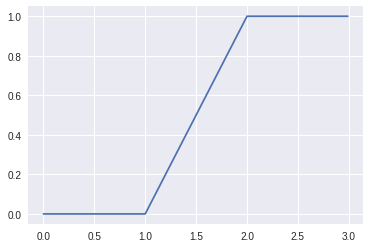

In [4]:
x = np.arange(0, 3, 0.01)

def F(x):
    return 0 if x <= 1 else  1 if x > 2 else x-1

plt.plot(x, np.array([F(y) for y in x]))

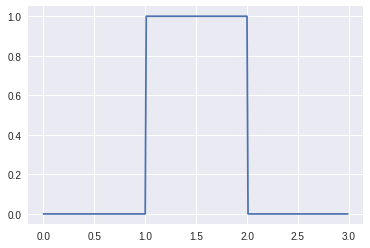

In [5]:
#плотность
x = np.arange(0, 3, 0.01)

def F(x):
    return 0 if x <= 1 else  0 if x > 2 else 1

plt.plot(x, np.array([F(y) for y in x]))

### Задание 6

Рассмотрим несбалансированный набор данных с соотношением меньшего класса к большему 1: 100, где 100 экземпляров принадлежит меньшему классу, а 10 000 большему.

Модель ML делает прогнозы и предсказывает 120 примеров как принадлежащих к классу меньшинства, 90 из которых верны, а 30 - неверны.

Найти:

- Precision **[0.5 point]**
- Recall **[0.5 point]**
- $F_1$ метрику **[0.5 point]**

Precision = 90/(90+30) = 0.75

Recal = 90/(90+0)= 1

F1 = 2*0.75*1/(0.75+1)=0.85 